## 1. Load Data & Perform General EDA

In [2]:
# I. import libraries
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from scipy import stats
import missingno as msno

In [3]:
# II. import the data to a dataframe and show number of rows & cols
df = pd.read_csv('ecommerce.csv')
print("Number of rows: " + str(df.shape[0]))
print("Number of columns:" + str(df.shape[1]))

Number of rows: 500
Number of columns:9


In [4]:
#III. Show the top 5 rows 
df.head()

,Unnamed: 0,Email,Address,Credit Card,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,0,adkv@ota.com,"89280 Mark Lane\nNew John, MN 16131",3544288738428794,35.497268,13.655651,40.577668,4.582621,588.951054
1,1,gjun@syj.com,"363 Amanda Cliff Apt. 638\nWest Angela, KS 31437",6546228325389133,32.926272,12.109461,38.268959,3.164034,393.204933
2,2,qjyr@pkk.com,"62008 Adam Lodge\nLake Pamela, NY 30677",4406395951712628314,34.000915,12.330278,38.110597,4.604543,488.547505
3,3,jkiu@xsb.com,"950 Tami Island\nLake Aimeeview, MT 93614",30334036663133,35.305557,14.717514,37.721283,3.620179,582.852344
4,4,stvb@niy.com,"08254 Kelly Squares\nNorth Lauren, AR 78382",3582080469154498,34.330673,13.795189,38.536653,4.946308,600.406092


In [5]:
#III. Show the last 5 rows
df.tail()

,Unnamed: 0,Email,Address,Credit Card,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
495,495,xskz@gwj.com,"7083 Wallace Rest\nNew Trevor, NM 70240",30206742023085,34.237660,14.566160,37.417985,4.246573,574.847438
496,496,awrc@iok.com,"663 Christopher Garden\nLake Carrieberg, PA 70796",6011536844623717,35.702529,12.695736,38.190268,4.076526,530.049004
497,497,pndt@jyr.com,"1555 Chen Road\nBergerchester, NH 46418",4086276267550896697,33.646777,12.499409,39.332576,5.458264,552.620145
498,498,zvtz@onj.com,"5568 Robert Station Apt. 030\nTurnerstad, GA 9...",36218092488069,34.322501,13.391423,37.840086,2.836485,457.469510
499,499,phqb@nlg.com,"424 Mark Junctions\nDarrellchester, TX 09088",5427200269739116,34.715981,13.418808,36.771016,3.235160,498.778642


In [6]:
# IV. call the describe method of dataframe to see summary statistics of the numerical columnsnew
new_df = df.select_dtypes(include = np.number)
new_df.describe()

,Unnamed: 0,Credit Card,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,5.000000e+02,500.000000,500.000000,500.000000,500.000000,500.000000
mean,249.500000,3.706324e+17,34.053194,13.052488,38.060445,4.033462,500.314038
std,144.481833,1.235588e+18,0.992563,0.994216,1.010489,0.999278,79.314782
min,0.000000,5.018057e+11,30.532429,9.508152,34.913847,0.769901,257.670582
25%,124.750000,3.683275e+13,33.341822,12.388153,37.349257,3.430450,446.038277
50%,249.500000,3.513612e+15,34.082008,12.983231,38.069367,4.033975,499.887875
75%,374.250000,4.777131e+15,34.711985,13.753850,38.716432,4.626502,550.313828
max,499.000000,4.959148e+18,37.139662,16.126994,41.005182,7.422689,766.518462


## Explain in words about the description of any two variables.

### Credit card is not very reliable as numeric value, as its numbers are only used for identification, not quantitative purposes, same goes for Email and Address

### Minimum length of membership can be less than a whole year (values have decimals, are not strictly ints)

In [7]:
# V. Missing value analysis

#Show a list with column wise count of missing values and display the list in count wise descending order
df.isnull().sum().sort_values(ascending = False)

Unnamed: 0              0
Email                   0
Address                 0
Credit Card             0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

## No missing values!

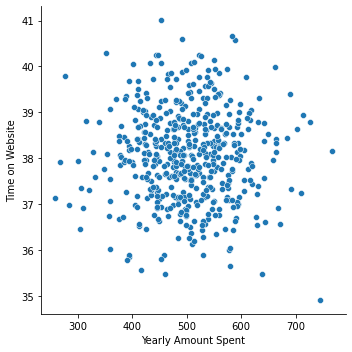

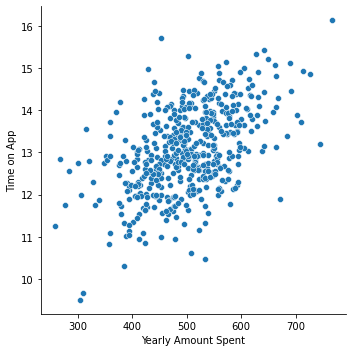

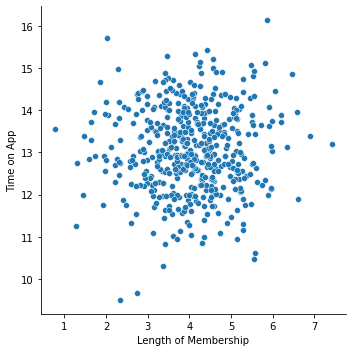

In [8]:
# VI. PLot various scatter plots to understand the data
    # Yearly amount spent vs time on website
sns.relplot(data = df, y = "Time on Website", x = "Yearly Amount Spent")
    # Yearly amount spent vs time on app
sns.relplot(data = df, y = "Time on App", x = "Yearly Amount Spent")
    # Length of membership vs time on app
sns.relplot(data = df, y = "Time on App", x = "Length of Membership")    
    # IV. Seaborn pairplot 

## Based on the plots, what feature is mostly correlated with the yearly amount spent?

### Time on app (middle plot shows positive correlation)

<AxesSubplot:>

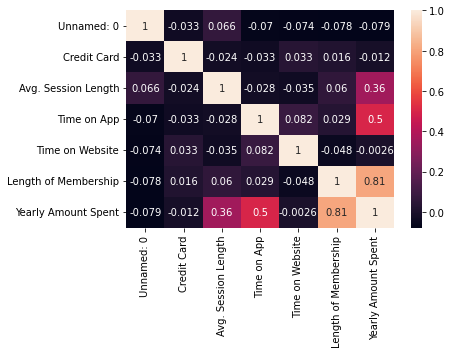

In [9]:
    # V. Plot sns heatmap based on correlation (annot = True)
    sns.heatmap(df.corr(), annot = True)

## Which columns must be removed based on the above plot?

### Unnamed (obviously), Credit Card, and Time on Website


## Which column is the most interesting and related to yearly amount spent?

### Length of Membership

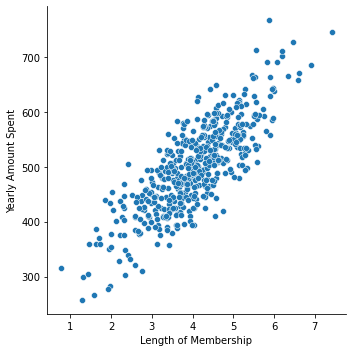

In [10]:
#VI. Generate a scatter plot based on the column from the above question against Yearly amount spent
sns.relplot(data = df, y = "Yearly Amount Spent", x = "Length of Membership")

##  2. Feature Selection & Pre-processing

In [11]:
# Drop unneccesary columns based on EDA & null analysis
df = df.drop(labels = ["Unnamed: 0", "Credit Card", "Time on Website", "Email", "Address" ], axis = 1)

## 3. X/Y & Train/Test Split

In [12]:
# I. Use sklearn's StandardScaler 
X = df[["Length of Membership"]]
y = df[["Yearly Amount Spent"]]

scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [13]:
# II. Split data into train & test sets using sklearn's train_test_split
# 30% of the data should be in the test set, with random_stat = 101
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .3, random_state = 101)

#Use sklearn's StandardScaler for scaling the X of training & test sets. But not for y (target) train and test
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

##  4. Training Linear Model using SKLearn's LinearRegression

In [14]:
# I. Train a linear model using SKLearn LinearRegression
lr = LinearRegression()
# fit to training data
lr.fit(X_train_scaled,y_train)

LinearRegression()

In [15]:
# II. Show coefficient and intercept after training
print("Coefficient: ", lr.coef_)
print("Intercept: ", lr.intercept_)

Coefficient:  [[63.04345407]]
Intercept:  [499.20662197]


In [16]:
#III. Predict for the test data
y_pred = lr.predict(X_test_scaled)
print("Predicted value: ", y_pred , sep = "\n")

Predicted value: 
[[371.83579601]
 [492.96075167]
 [492.60079547]
 [556.85492114]
 [597.18095979]
 [517.76796611]
 [550.33474479]
 [596.0338348 ]
 [475.60618837]
 [549.76249278]
 [383.88613297]
 [426.30464324]
 [520.52313863]
 [442.00103108]
 [615.6676527 ]
 [542.71690157]
 [636.40350294]
 [495.01031549]
 [498.08419864]
 [513.64378058]
 [531.60128609]
 [527.06059832]
 [390.37124373]
 [507.00733385]
 [547.47234306]
 [479.13717947]
 [495.32653849]
 [351.87390205]
 [494.71253898]
 [487.57296173]
 [532.74594446]
 [524.2877641 ]
 [442.36699929]
 [562.87881802]
 [493.48109308]
 [564.01579963]
 [495.28814651]
 [477.49162934]
 [385.12216808]
 [443.32544672]
 [621.02972961]
 [499.14698155]
 [576.05646422]
 [523.45641518]
 [462.83013518]
 [477.17641891]
 [590.88744087]
 [501.45389117]
 [460.55042748]
 [481.41539221]
 [514.88365584]
 [522.68590693]
 [325.92061651]
 [535.2716955 ]
 [577.86347433]
 [335.20258383]
 [523.09376666]
 [472.3953404 ]
 [485.5027917 ]
 [422.15386179]
 [503.24826379]
 [549.

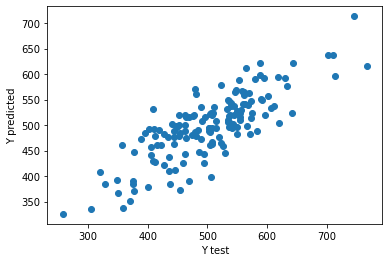

In [17]:
#IV. Generate a scatter plot that shows the Y-test on x- axis and y-pridected in y- axis
plt.scatter(y_test,y_pred, marker = 'o')
plt.plot()
plt.xlabel("Y test")
plt.ylabel("Y predicted")
plt.show()

In [18]:
#V. Use sklearn's metrics to print the value of MAE, MSE, RMSE, and R^2
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

# print MAE (mean absolute error)
print("MAE: ", mean_absolute_error(y_test, y_pred))

# print MSE (mean squared error)
print("MSE: ", mean_squared_error(y_test, y_pred))

# print RMSE (root mean squared error)
print("RMSE: ", sqrt(mean_squared_error(y_test, y_pred)))

# print r^2
print("R^2: ", r2_score(y_test,y_pred))

MAE:  40.90606096474333
MSE:  2551.5330908757346
RMSE:  50.51270227255452
R^2:  0.6484902730789126


In [19]:
# VI. Interpret the coefficient & which coefficient belongs to which feature and explain any strategy that should help the business

## 5. Normal Equation

In [20]:
X_train_scaled.shape

(350, 1)

In [21]:
from sklearn.datasets import make_regression
#x, y = make_regression(n_samples = 100, n_features = 1, n_informative = 1, noise = 10, random_state = 10)
x = X_train_scaled
# convert target variable array from 1d to 2d
y = y_train
#  adding x0= 1 to each new instance
x_new = np.array([np.ones(len(x)),x.flatten()]).T

theta_best_values = np.linalg.inv(x_new.T.dot(x_new)).dot(x_new.T).dot(y)

## The coefficient we got from linear regression is very close to the 2nd theta value, but the intercept does not line up

In [22]:
# prepare the test set before prediction
x_sample_new = np.array([np.ones(len(x)), x.flatten()]).T

#perform prediction for the test set
predict_value = x_sample_new.dot(theta_best_values)
predict_value

array([[516.74946326],
       [512.13789889],
       [570.52971241],
       [444.67342164],
       [531.91447696],
       [533.90205498],
       [438.47416049],
       [480.00767455],
       [485.65167522],
       [362.11657464],
       [478.49700147],
       [536.83228067],
       [505.57733377],
       [573.89317962],
       [478.32499421],
       [577.51799451],
       [498.29539089],
       [546.88814013],
       [541.19574367],
       [457.43054334],
       [473.64116992],
       [474.11442385],
       [477.03186791],
       [530.06540802],
       [569.47347086],
       [526.73822383],
       [485.10402344],
       [534.13641664],
       [459.77102297],
       [516.19771925],
       [529.89915615],
       [537.32143882],
       [573.95617557],
       [544.89862536],
       [572.48027948],
       [448.29001218],
       [507.39392424],
       [659.81484678],
       [440.40088902],
       [513.25217029],
       [391.36935146],
       [499.84354331],
       [495.89748211],
       [432

Text(0, 0.5, 'Y predicted')

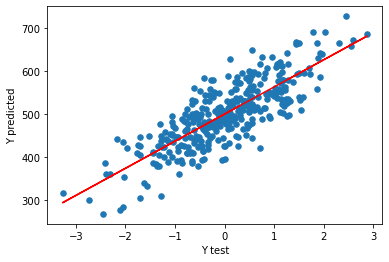

In [23]:
# generate a scatter lpot that shows Y-test on x axis and y pred on y axis
plt.scatter(x, y, s=30, marker = 'o')
plt.plot(x,predict_value, c = 'red')
plt.xlabel("Y test")
plt.ylabel("Y predicted")

In [24]:
# use sklearn's metrics to print MAE, MSE, RMSE, and R^2

# print MAE (mean absolute error)
print("MAE: ", mean_absolute_error(x,predict_value))

# print MSE (mean squared error)
print("MSE: ", mean_squared_error(x,predict_value))

# print RMSE (root mean squared error)
print("RMSE: ", sqrt(mean_squared_error(x,predict_value)))

# print r^2
print("R^2: ", r2_score(x,predict_value))

MAE:  499.7149238163755
MSE:  253443.1390209243
RMSE:  503.4313647568299
R^2:  -261685.28878517618


## What is the limitation of using the Normal Equation for regression?
### Since the normal equation creates an inverse of a roughly n x n matrix, the algorithm for inverting the matrix runs O(n^2) so this method becomes computationally slow as the data set becomes larger.

## 6. Batch Gradient Descent

In [25]:
y_pred = np.empty(y_pred.shape)
# implement batch gradient descent
cost_list = []
epoch_list = []
pred_list = []

eta = .1
n_iterations = 1000
m = 100
X_b = np.array([np.ones(len(x)),x.flatten()]).T
theta = np.random.randn(2,1)
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta)- y)
    theta = theta - eta * gradients
    y_pred = np.dot(theta.T, x_new.T).reshape((350,1))
    # Calculate mean squared error (MSE)
    cost = np.mean(np.square(y_train-y_pred)) 
    
    if (iteration % 10 == 0):
        cost_list.append(cost)
        epoch_list.append(iteration)

In [26]:
#Display the theta values. 
#Are they very close to the sklearn's linear regression?
theta

array([[499.20662197],
       [ 63.04345407]])

## The theta values are very close to the ones obtained in linear regression!

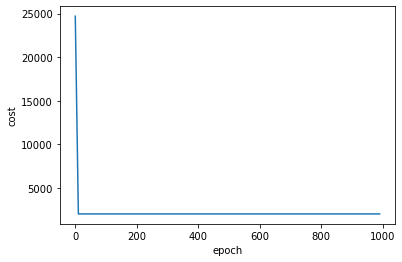

In [27]:
# plot step numbr (in x-axis) against the cost(y axis)

plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

In [28]:
#Prepare the test set before prediction
X_b = np.array([np.ones(len(X_test_scaled)),X_test_scaled.flatten()]).T

# scale y data 
y_train_scaled = scaler.transform(y_train)
y_test_scaled = scaler.transform(y_test)

In [29]:
#Perform prediction for the test set
theta = np.random.randn(2,1)
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta)- y_test_scaled)
    theta = theta - eta * gradients
    y_pred = np.dot(theta.T, X_b.T)
y_pred

array([[365.37246317, 493.19839614, 492.81852615, 560.62737294,
        603.18436284, 519.3780163 , 553.74648187, 601.97377562,
        474.88372901, 553.14257125, 378.08945907, 422.85468207,
        522.28561281, 439.41943877, 622.69379221, 545.70719788,
        644.57680871, 495.36134767, 498.60528679, 515.02566909,
        533.97663492, 529.18474337, 384.93334462, 508.02207523,
        550.72572394, 478.61006458, 495.69506502, 344.30622041,
        495.04709731, 487.51253834, 535.18461904, 526.25850807,
        439.80565337, 566.98452894, 493.74752433, 568.18441161,
        495.6545491 , 476.87347793, 379.39387516, 440.81712485,
        628.35251448, 499.72686588, 580.89120004, 525.38116656,
        461.40086819, 476.54082917, 596.54266853, 502.1614003 ,
        458.99504056, 481.01431453, 516.33413777, 524.56803161,
        316.91712525, 537.85010182, 582.79817909, 326.71259741,
        524.9984553 , 471.49524779, 485.3278406 , 418.47426758,
        504.05504272, 552.92350708, 725.

In [30]:
y_pred.shape

(1, 150)

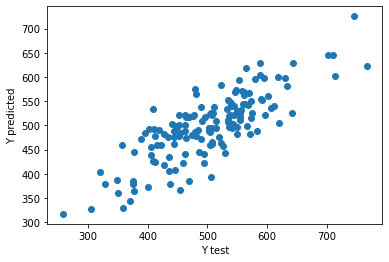

In [31]:
#IV. Generate a scatter plot that shows the Y-test on x- axis and y-pridected in y- axis
plt.scatter(y_test,y_pred, marker = 'o')
plt.plot()
plt.xlabel("Y test")
plt.ylabel("Y predicted")
plt.show()

In [32]:
y_test.shape

(150, 1)

In [33]:
y_pred = y_pred.reshape(150,1)

In [34]:
# print MAE (mean absolute error)
print("MAE: ", mean_absolute_error(y_test, y_pred))

# print MSE (mean squared error)
print("MSE: ", mean_squared_error(y_test, y_pred))

# print RMSE (root mean squared error)
print("RMSE: ", sqrt(mean_squared_error(y_test, y_pred)))

# print r^2
print("R^2: ", r2_score(y_test,y_pred))

MAE:  40.7967716913424
MSE:  2535.792118506177
RMSE:  50.35664919855348
R^2:  0.6506588143840919


## Short Question: How do derivatives help in the process of gradient descent?
### Answer: Derivatives are used in order to define "steps" towards the local minimum of a given regression function. They help us determine our theta values at each point along the slope.

## Advantages and Disadvantages of Batch Gradient Descent
### Some advantages of BGD is that it is computationally efficient compared to running Linear Regressors and Normal Equation, and it generally runs faster than these as well. Some disadvantages are that it performs redundant computations on the data set and can also take a long time on very large data sets

# 7. Stochastic Gradient Descent

In [35]:

y_pred = np.empty(y_pred.shape)

In [36]:
# Implement Stochastic Gradient Descent and train our data set. 
m = len(X_train_scaled)
n_epochs = 50
t0, t1 = 5, 50

cost_list = []
epoch_list = []
pred_list = []

def learning_schedule(t):
    return t0/ (t+t1)
theta = np.random.randn(2,1)
# perform prediction
for epoch in range(n_epochs):
    for i in range(m):
        if i == 101:
            i = 0
        rand_index = np.random.randint(m)
        xi = X_b[rand_index : rand_index +1]
        yi = y_train_scaled[rand_index : rand_index + 1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
    y_pred = np.dot(theta.T, X_b.T)
    cost = np.mean(np.square(y_train_scaled-y_pred))
    if epoch % 10 == 0:
        cost_list.append(cost)
        epoch_list.append(epoch)
    

In [37]:
theta

array([[497.02226112],
       [  4.82940055]])

## Display the theta values. Are they very close to the sklearn's linear regression?
### The first theta value is very close to the original coefficient we got from linear regression but the second (intercept) is not very close.

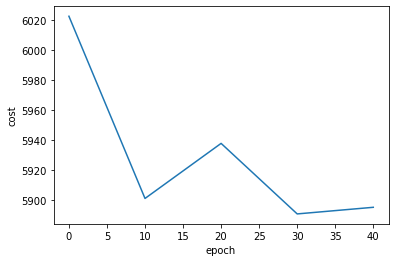

In [38]:
# plot step against cost
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

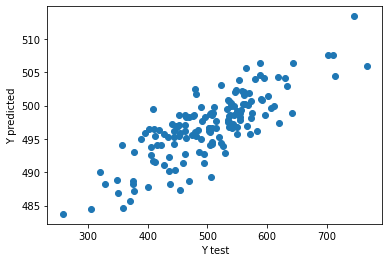

In [39]:
#IV. Generate a scatter plot that shows the Y-test on x- axis and y-pridected in y- axis
plt.scatter(y_test,y_pred, marker = 'o')
plt.plot()
plt.xlabel("Y test")
plt.ylabel("Y predicted")
plt.show()

In [40]:
y_pred = y_pred.reshape(150,1)

In [41]:
# print MAE (mean absolute error)
print("MAE: ", mean_absolute_error(y_test, y_pred))

# print MSE (mean squared error)
print("MSE: ", mean_squared_error(y_test, y_pred))

# print RMSE (root mean squared error)
print("RMSE: ", sqrt(mean_squared_error(y_test, y_pred)))

# print r^2
print("R^2: ", r2_score(y_test,y_pred))

MAE:  63.964944434041804
MSE:  6618.173544377079
RMSE:  81.3521575889483
R^2:  0.08825310413595144


## What are the benefits and the limitations of using Stochastic gradient descent?
### Some advantages are that is fast, and more effecient on larger data sets. Some disadvantages are that randomly picking instances can result in computational redundancy and missing several instances while repeating others. It generally converges more slowly

## 8. SGDRegressor

In [42]:
# Use sklearn's SGDRegressor to train a model for our data set. Put a reasonable iteration and tolerance and learning steps so that we can get coefficients close to normal equation
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor()
sgd_reg.fit(X_train_scaled,y_train_scaled.ravel())

SGDRegressor()

In [43]:
# Display the theta values. Are they very close to sklearn's linear regression?

In [44]:
sgd_reg.intercept_

array([495.96644459])

In [45]:
sgd_reg.coef_

array([63.01223502])

## Our theta values are very close to our original linear regression!

In [46]:
# Predict for the test data
y_pred = sgd_reg.predict(X_test_scaled)

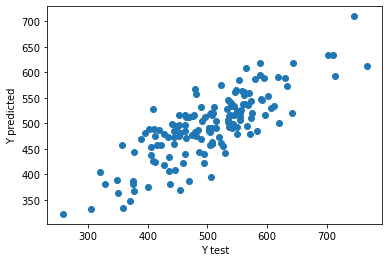

In [47]:
# Generate a scatter plot that shows the Y test on the x-axis and y predicted in the y-axis
plt.scatter(y_test,y_pred, marker = 'o')
plt.plot()
plt.xlabel("Y test")
plt.ylabel("Y predicted")
plt.show()

In [48]:
# print MAE (mean absolute error)
print("MAE: ", mean_absolute_error(y_test, y_pred))

# print MSE (mean squared error)
print("MSE: ", mean_squared_error(y_test, y_pred))

# print RMSE (root mean squared error)
print("RMSE: ", sqrt(mean_squared_error(y_test, y_pred)))

# print r^2
print("R^2: ", r2_score(y_test,y_pred))

MAE:  41.13395355355476
MSE:  2586.172098302054
RMSE:  50.85442063677507
R^2:  0.6437182604858624


# 9. Mini-batch Gradient Descent

## Briefly explain how mini-batch can overcome the limitations of Batch gradient descent and SGD.
### By computing gradients on small mini-batches (random sets of instances), it gives us a performance boost over SGD and BGD, and we will generally be a bit closer to the minimum than SGD. 

# 10. Polynomial of degree 2 

In [49]:
#Use sklearn's Polynomial features to degree = 2 on our training and test set
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias = False)
X_train_poly = poly_features.fit_transform(X_train_scaled)

In [50]:
# Use linearRegression on the new polynomial features
lin_reg = LinearRegression()
lin_reg.fit(X_train_poly,y_train_scaled)

LinearRegression()

In [51]:
lin_reg.intercept_, lin_reg.coef_

(array([495.86252367]), array([[63.16360087,  0.17018884]]))

## Our theta values are very close to our original linear regression!

In [52]:
#Predict for test set
X_test_poly = poly_features.transform(X_test_scaled)
y_new = lin_reg.predict(X_test_poly)

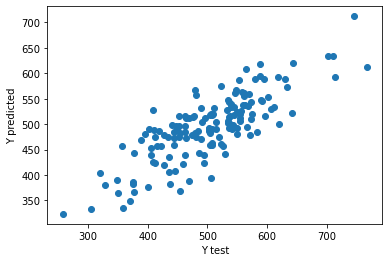

In [53]:
# Generate a scatter plot that shows the Y test on the x-axis and y predicted in the y-axis
plt.scatter(y_test,y_new, marker = 'o')
plt.plot()
plt.xlabel("Y test")
plt.ylabel("Y predicted")
plt.show()

In [54]:
# print MAE (mean absolute error)
print("MAE: ", mean_absolute_error(y_test, y_new))

# print MSE (mean squared error)
print("MSE: ", mean_squared_error(y_test, y_new))

# print RMSE (root mean squared error)
print("RMSE: ", sqrt(mean_squared_error(y_test, y_new)))

# print r^2
print("R^2: ", r2_score(y_test,y_new))

MAE:  41.1012190142125
MSE:  2581.448959567414
RMSE:  50.80796157658182
R^2:  0.6443689395669062


# 11. Polynomial of degree 3

In [55]:
# Use sklearn's Polynomial features to degree = 3 on our training and test set
poly_features = PolynomialFeatures(degree=3, include_bias = False)
X_train_poly = poly_features.fit_transform(X_train_scaled)

In [56]:
# Use linearRegression on the new polynomial features
lin_reg = LinearRegression()
lin_reg.fit(X_train_poly,y_train_scaled)
lin_reg.intercept_, lin_reg.coef_

(array([495.68330235]), array([[60.58201415,  0.42630355,  0.83917808]]))

### Our theta values are very close to our original linear regression!¶

In [57]:
# Predict for test set
X_test_poly = poly_features.transform(X_test_scaled)
y_new = lin_reg.predict(X_test_poly)

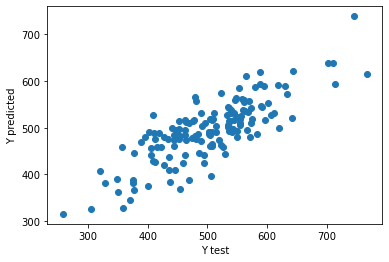

In [58]:
# Generate a scatter plot that shows the Y test on the x-axis and y predicted in the y-axis
plt.scatter(y_test,y_new, marker = 'o')
plt.plot()
plt.xlabel("Y test")
plt.ylabel("Y predicted")
plt.show()

In [59]:
# print MAE (mean absolute error)
print("MAE: ", mean_absolute_error(y_test, y_new))

# print MSE (mean squared error)
print("MSE: ", mean_squared_error(y_test, y_new))

# print RMSE (root mean squared error)
print("RMSE: ", sqrt(mean_squared_error(y_test, y_new)))

# print r^2
print("R^2: ", r2_score(y_test,y_new))

MAE:  40.895180045340915
MSE:  2562.242363984242
RMSE:  50.61859701714619
R^2:  0.6470149194261003


# 12. Learning Curve

In [60]:

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [61]:
def plot_learning_curves(model):
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_test)
        train_errors.append(mean_squared_error(y_train[:m],y_train_predict))
        val_errors.append(mean_squared_error(y_test,y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth = 2, label = "train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth = 3, label = "val")



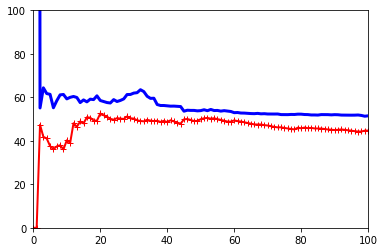

In [62]:
# Generate learning curve with linearRegression
lin_reg = LinearRegression()
plot_learning_curves(lin_reg)
plt.axis([0, 100, 0, 100])
plt.show()


## Interpret the result:
### Naturally the performance on training and testing data is poor on the first instance, but gradually the performance plateaus until the data becomes noisy and nonlinear. At this point, adding more instances would not improve the performance of this model, and shows potential underfitting issues.

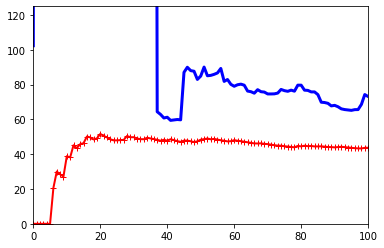

In [63]:
# generate learning curve w/ polynomial regression
from sklearn.pipeline import Pipeline
polynomial_reg = Pipeline([
    ("poly_features", PolynomialFeatures(degree = 5, include_bias = False)),
    ("lin_reg", LinearRegression()),
])
plot_learning_curves(polynomial_reg)
plt.axis([0, 100, 0, 125])
plt.show()

## Interpret the result: 
### The error on training data is much lower than that of our previous Linear Regression model, and the gap between the curves is (eventually) much larger than the previous. This gap shows possible overfitting, so we could overcome this by providing more training instances to the model.

# 13. Regularization

## The purpose of regularization: regularization helps us reduce error and prevent overfitting by properly fitting a function on a given training set and also reduces variance without adding a signficant bias.

# 14. Ridge Regression

In [64]:
# train ridge using polynomial degree 3 dataset
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha = 1, solver = "cholesky")
ridge_reg.fit(X_train_poly,y_train_scaled)
# Predict for test set
y_pred = ridge_reg.predict(X_test_poly)


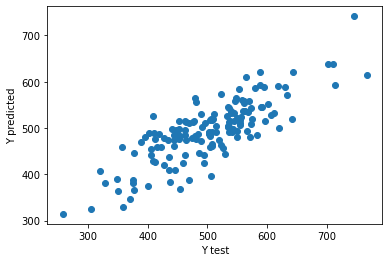

In [65]:
# Generate a scatter plot that shows the Y test on the x-axis and y predicted in the y-axis
plt.scatter(y_test,y_pred, marker = 'o')
plt.plot()
plt.xlabel("Y test")
plt.ylabel("Y predicted")
plt.show()

In [66]:
# print MAE (mean absolute error)
print("MAE: ", mean_absolute_error(y_test, y_pred))

# print MSE (mean squared error)
print("MSE: ", mean_squared_error(y_test, y_pred))

# print RMSE (root mean squared error)
print("RMSE: ", sqrt(mean_squared_error(y_test, y_pred)))

# print r^2
print("R^2: ", r2_score(y_test,y_pred))

MAE:  40.887318202869054
MSE:  2562.111981772858
RMSE:  50.617309112326964
R^2:  0.6470328814175332


# 15. SGDRegressor for Ridge

In [67]:
# Use sklearn's SGDRegressor for Ridge Regression
sgd_reg = SGDRegressor(penalty = "l2")
sgd_reg.fit(X_train_scaled,y_train_scaled.ravel())

# Predict for test set
y_pred = sgd_reg.predict(X_test_scaled)

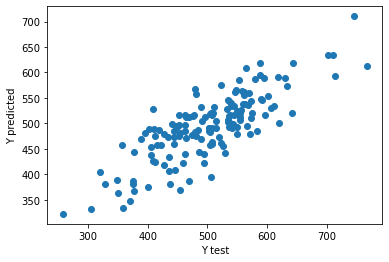

In [68]:
# Generate a scatter plot that shows the Y test on the x-axis and y predicted in the y-axis
plt.scatter(y_test,y_pred, marker = 'o')
plt.plot()
plt.xlabel("Y test")
plt.ylabel("Y predicted")
plt.show()

In [69]:
# print MAE (mean absolute error)
print("MAE: ", mean_absolute_error(y_test, y_pred))

# print MSE (mean squared error)
print("MSE: ", mean_squared_error(y_test, y_pred))

# print RMSE (root mean squared error)
print("RMSE: ", sqrt(mean_squared_error(y_test, y_pred)))

# print r^2
print("R^2: ", r2_score(y_test,y_pred))

MAE:  41.11879542768603
MSE:  2583.940906691265
RMSE:  50.83247885644831
R^2:  0.6440256386486705


# 16. Lasso Regression 

In [70]:
from sklearn.linear_model import Lasso
lasso_reg =  Lasso(alpha = .1)
lasso_reg.fit(X_train_scaled, y_train_scaled)
y_pred = lasso_reg.predict(X_test_scaled)

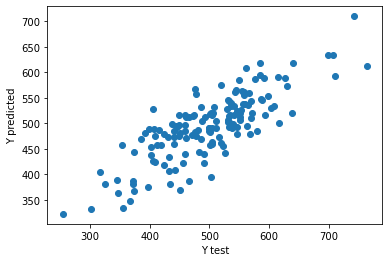

In [71]:
plt.scatter(y_test_scaled,y_pred, marker = 'o')
plt.plot()
plt.xlabel("Y test")
plt.ylabel("Y predicted")
plt.show()

In [72]:
# print MAE (mean absolute error)
print("MAE: ", mean_absolute_error(y_test, y_pred))

# print MSE (mean squared error)
print("MSE: ", mean_squared_error(y_test, y_pred))

# print RMSE (root mean squared error)
print("RMSE: ", sqrt(mean_squared_error(y_test, y_pred)))

# print r^2
print("R^2: ", r2_score(y_test,y_pred))

MAE:  41.12644360978626
MSE:  2585.061202700001
RMSE:  50.843497152536635
R^2:  0.6438713020478598


# How Lasso perform the regularization and how does that affect the thetas?



# 17. Elastic Net

In [73]:
# Use sklearn's ElasticNet

from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha = .1, l1_ratio = .5)
elastic_net.fit(X_train_scaled, y_train_scaled)

# Predict for test set
y_pred = elastic_net.predict(X_test_scaled)

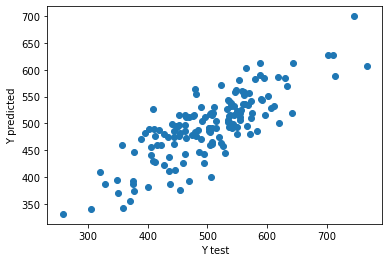

In [74]:
# Generate a scatter plot that shows the Y test in x axis and y predicted in y axis
plt.scatter(y_test,y_pred, marker = 'o')
plt.plot()
plt.xlabel("Y test")
plt.ylabel("Y predicted")
plt.show()

In [75]:
# print MAE (mean absolute error)
print("MAE: ", mean_absolute_error(y_test, y_pred))

# print MSE (mean squared error)
print("MSE: ", mean_squared_error(y_test, y_pred))

# print RMSE (root mean squared error)
print("RMSE: ", sqrt(mean_squared_error(y_test, y_pred)))

# print r^2
print("R^2: ", r2_score(y_test,y_pred))

MAE:  41.32546460518151
MSE:  2615.8946151277673
RMSE:  51.14581718115146
R^2:  0.6396235639247342


## How is ElasticNet different compared to Lasso and RIDGE perform the regularization and how does that affect the thetas?
### Elastic Net's regularization is a combination of Ridge and Lasso Regression regularization methods. The difference is you can control r (the mix ratio). When r is 0, elastic net behaves the sames as ridge regression does, and when r is 1, it behaves just like lasso regression